In [ ]:

import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:

!unzip gdrive/My\Drive/train

Archive:  gdrive/MyDrive/train.zip
  inflating: train_timeseries.csv    


In [ ]:
df=pd.read_csv('train_timeseries.csv')

In [ ]:
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
df.shape

(19300680, 21)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
df.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month
df['day']=pd.DatetimeIndex(df['date']).day
df['score']=df['score'].round().astype(int)
df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
df['fips'].nunique()

3108

In [ ]:
df['score'].round().value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

In [ ]:
df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,1.124720e+01,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,4.038022e+00,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,1.600000e-01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,8.370000e+00,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,1.120000e+01,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,1.408000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,3.017000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


In [ ]:
column_list=list(df.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

outlier treatment

TypeError: ignored

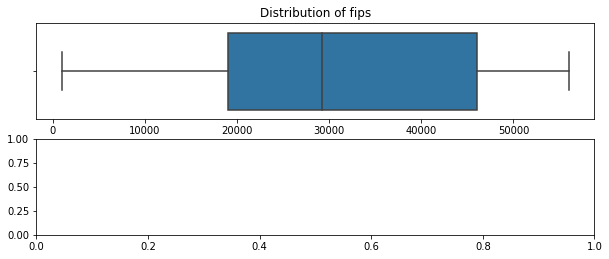

In [ ]:
plt.figure(figsize=(10,40))
for x in range(1,19):
    plt.subplot(19,1,x)
    sns.boxplot(x =df.columns[x-1], data=df)
    x_name = df.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [ ]:
print('Total rows = ',len(df.index))
for i in df.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(df[(df[i] >df[i].mean() + 3*df[i].std()) | (df[i] < df[i].mean() - 3*df[i].std())]))

Total rows =  2756796
Number of values beyong standard outlier limit in  fips
0
Number of values beyong standard outlier limit in  PRECTOT
65933
Number of values beyong standard outlier limit in  PS
73197
Number of values beyong standard outlier limit in  QV2M
1
Number of values beyong standard outlier limit in  T2M
4531
Number of values beyong standard outlier limit in  T2MDEW
2023
Number of values beyong standard outlier limit in  T2MWET
1814
Number of values beyong standard outlier limit in  T2M_MAX
3384
Number of values beyong standard outlier limit in  T2M_MIN
6944
Number of values beyong standard outlier limit in  T2M_RANGE
3628
Number of values beyong standard outlier limit in  TS
4762
Number of values beyong standard outlier limit in  WS10M
29954
Number of values beyong standard outlier limit in  WS10M_MAX
23387
Number of values beyong standard outlier limit in  WS10M_MIN
39901
Number of values beyong standard outlier limit in  WS10M_RANGE
35979
Number of values beyong standard

In [ ]:
df = [(df['PRECTOT'] >=df['PRECTOT'].mean() + 3*df['PRECTOT'].std()) &
        (df['PRECTOT'] >= df['PRECTOT'].mean() - 3*df['PRECTOT'].std())]

df =[(df['PS'] <= df['PS'].mean() + 3*df['PS'].std()) &
        (df['PS'] >= df['PS'].mean() - 3*df['PS'].std())]

df = df[(df['QV2M'] <= df['QV2M'].mean() + 3*df['QV2M'].std()) &
        (df['QV2M'] >= df['QV2M'].mean() - 3*df['QV2M'].std())]

df = df[(df['T2M'] <= df['T2M'].mean() + 3*df['T2M'].std()) &
        (df['T2M'] >= df['T2M'].mean() - 3*df['T2M'].std())]

df = df[(df['T2MDEW'] <= df['T2MDEW'].mean() + 3*df['T2MDEW'].std()) &
        (df['T2MDEW'] >= df['T2MDEW'].mean() - 3*df['T2MDEW'].std())]
df = df[(df['T2MWET'] <= df['T2MWET'].mean() + 3*df['T2MWET'].std()) &
        (df['T2MWET'] >= df['T2MWET'].mean() - 3*df['T2MWET'].std())]

df = df[(df['T2M_MAX'] <= df['T2M_MAX'].mean() + 3*df['T2M_MAX'].std()) &
        (df['T2M_MAX'] >= df['T2M_MAX'].mean() - 3*df['T2M_MAX'].std())]

df = df[(df['T2M_MIN'] <= df['T2M_MIN'].mean() + 3*df['T2M_MIN'].std()) &
        ( df['T2M_MIN'] >= df['T2M_MIN'].mean() - 3*df['T2M_MIN'].std())]

df = df[(['T2M_RANGE'] <=df['T2M_RANGE'].mean() + 3*df['T2M_RANGE'].std()) &
        (df['T2M_RANGE'] >= df['T2M_RANGE'].mean() - 3*df['T2M_RANGE'].std())]

df = df[(df['TS'] <= df['TS'].mean() + 3*df['TS'].std()) &
        (df['TS'] >= df['TS'].mean() - 3* df['TS'].std())
df = df[(df['WS10M'] <= df['WS10M'].mean() + 3*df['WS10M'].std())] &
        (df['WS10M'] >= df['WS10M'].mean() - 3*df['WS10M'].std())

df = df[(df['WS10M_MAX'] <= df['WS10M_MAX'].mean() + 3*df['WS10M_MAX'].std()) &
        (df['WS10M_MAX'] >= df['WS10M_MAX'].mean() -3*df['WS10M_MAX'].std())]

df = df[(df['WS10M_MIN'] <= df['WS10M_MIN'].mean() + 3*df['WS10M_MIN'].std()) &
        (df['WS10M_MIN'] >= df['WS10M_MIN'].mean() - 3*df['WS10M_MIN'].std())]

df = df[(df['WS10M_RANGE'] <= df['WS10M_RANGE'].mean() + 3*df['WS10M_RANGE'].std()) &
        (df['WS10M_RANGE'] >= df['WS10M_RANGE'].mean() - 3*df['WS10M_RANGE'].std())]
df = df[(df['WS50M'] <= df['WS50M'].mean() + 3*df['WS50M'].std()) &
        (df['WS50M'] >= df['WS50M'].mean() - 3*df['WS50M'].std())]

df = df[(df['WS50M_MAX'] <= df['WS50M_MAX'].mean() + 3*df['WS50M_MAX'].std()) &
        (df['WS50M_MAX'] >= df['WS50M_MAX'].mean() - 3*df['WS50M_MAX'].std())]

df = df[(df['WS50M_MIN'] <= df['WS50M_MIN'].mean() + 3*df['WS50M_MIN'].std()) &
        (df['WS50M_MIN'] >= df['WS50M_MIN'].mean() - 3*df['WS50M_MIN'].std())]

df = df[(df['WS50M_RANGE'] <= df['WS50M_RANGE'].mean() + 3*df['WS50M_RANGE'].std()) &
        (df['WS50M_RANGE'] >= df['WS50M_RANGE'].mean() - 3*df['WS50M_RANGE'].std())]

print('Total rows = ',len(df.index))
df = df[(df['PRECTOT'] <= df['PRECTOT'].mean() + 3*df['PRECTOT'].std()) &
        (df['PRECTOT'] >= df['PRECTOT'].mean() - 3*df['PRECTOT'].std())]

df = df[(df['PS'] <= df['PS'].mean() + 3*df['PS'].std()) &
        (df['PS'] >= df['PS'].mean() - 3*df['PS'].std())]

df = df[(df['QV2M'] <= df['QV2M'].mean() + 3*df['QV2M'].std()) &
        (df['QV2M'] >= df['QV2M'].mean() - 3*df['QV2M'].std())]

df = df[(df['T2M'] <= df['T2M'].mean() + 3*df['T2M'].std()) &
        (df['T2M'] >= df['T2M'].mean() - 3*df['T2M'].std())]

df = df[(df['T2MDEW'] <= df['T2MDEW'].mean() + 3*df['T2MDEW'].std()) &
        (df['T2MDEW'] >= df['T2MDEW'].mean() - 3*df['T2MDEW'].std())]

df = df[(df['T2MWET'] <= df['T2MWET'].mean() + 3*df['T2MWET'].std()) &
        (df['T2MWET'] >= df['T2MWET'].mean() - 3*df['T2MWET'].std())]

df = df[(df['T2M_MAX'] <= df['T2M_MAX'].mean() + 3*df['T2M_MAX'].std()) &
        (df['T2M_MAX'] >= df['T2M_MAX'].mean() - 3*df['T2M_MAX'].std())]

df = df[(df['T2M_MIN'] <= df['T2M_MIN'].mean() + 3*df['T2M_MIN'].std()) &
        (df['T2M_MIN'] >= df['T2M_MIN'].mean() - 3*df['T2M_MIN'].std())]

df = df[(df['T2M_RANGE'] <= df['T2M_RANGE'].mean() + 3*df['T2M_RANGE'].std()) &
        (df['T2M_RANGE'] >= df['T2M_RANGE'].mean() - 3*df['T2M_RANGE'].std())]

df = df[(df['TS'] <= df['TS'].mean() + 3*df['TS'].std()) &
        (df['TS'] >= df['TS'].mean() - 3*df['TS'].std())]

df = df[(df['WS10M'] <= df['WS10M'].mean() + 3*df['WS10M'].std()) &
        (df['WS10M'] >= df['WS10M'].mean() - 3*df['WS10M'].std())]

df = df[(df['WS10M_MAX'] <= df['WS10M_MAX'].mean() + 3*df['WS10M_MAX'].std()) &
        (df['WS10M_MAX'] >= df['WS10M_MAX'].mean() - 3*df['WS10M_MAX'].std())]

df = df[(df['WS10M_MIN'] <= df['WS10M_MIN'].mean() + 3*df['WS10M_MIN'].std()) &
        (df['WS10M_MIN'] >= df['WS10M_MIN'].mean() - 3*df['WS10M_MIN'].std())]

df = df[(df['WS10M_RANGE'] <= df['WS10M_RANGE'].mean() + 3*df['WS10M_RANGE'].std()) &
        (df['WS10M_RANGE'] >= df['WS10M_RANGE'].mean() - 3*df['WS10M_RANGE'].std())]

df = df[(df['WS50M'] <= df['WS50M'].mean() + 3*df['WS50M'].std()) &
        (df['WS50M'] >= df['WS50M'].mean() - 3*df['WS50M'].std())]

df = df[(df['WS50M_MAX'] <= df['WS50M_MAX'].mean() + 3*df['WS50M_MAX'].std()) &
        (df['WS50M_MAX'] >= df['WS50M_MAX'].mean() - 3*df['WS50M_MAX'].std())]

df = df[(df['WS50M_MIN'] <= df['WS50M_MIN'].mean() + 3*df['WS50M_MIN'].std()) &
        (df['WS50M_MIN'] >= df['WS50M_MIN'].mean() - 3*df['WS50M_MIN'].std())]

df = df[(df['WS50M_RANGE'] <= df['WS50M_RANGE'].mean() + 3*df['WS50M_RANGE'].std()) &
        (df['WS50M_RANGE'] >= df['WS50M_RANGE'].mean() - 3*df['WS50M_RANGE'].std())]

print('Total rows = ',len(df.index))

SyntaxError: ignored

In [ ]:
categorical_column_list = ['score','year','month','day']
df_categorical = df[['score','year','month','day']]


<Figure size 720x2880 with 0 Axes>

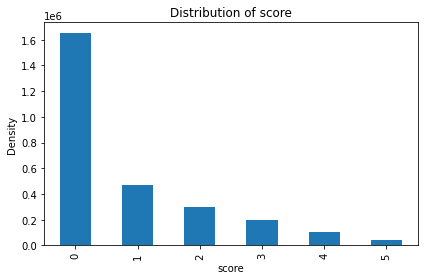

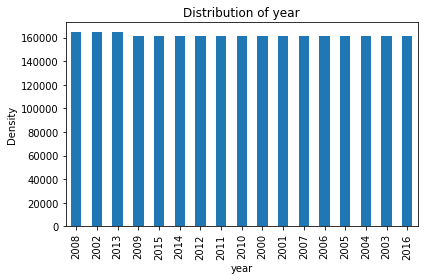

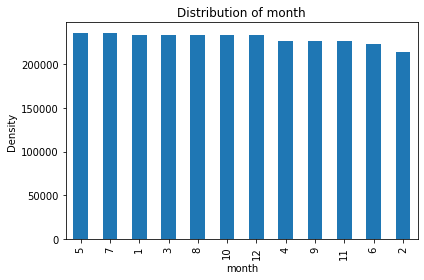

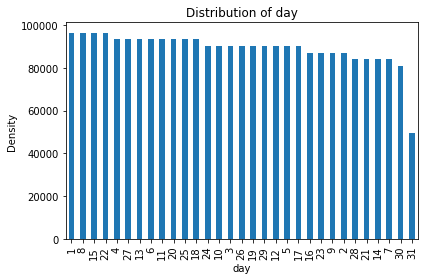

In [ ]:
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()


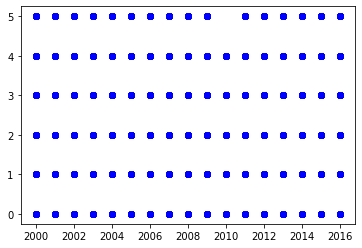

In [ ]:
plt.scatter(df['year'], df['score'], c ="blue")
plt.show()


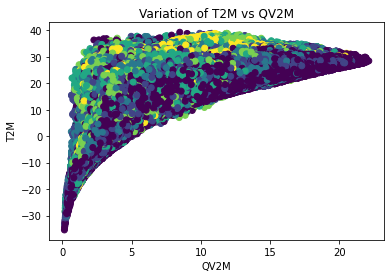

In [ ]:
plt.scatter(df['QV2M'], df['T2M'], c =df['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()


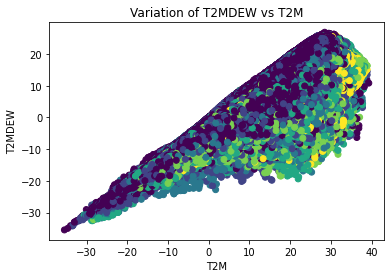

In [ ]:
plt.scatter(df['T2M'], df['T2MDEW'], c =df['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M')
plt.show()


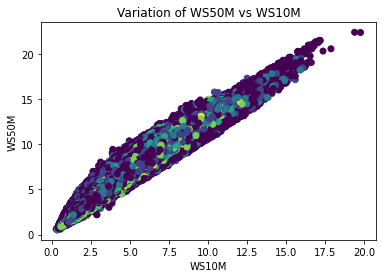

In [ ]:
temp_df = df[df['score']==5]
plt.scatter(df['WS10M'], df['WS50M'], c= df['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
plt.show()


In [ ]:
independent_variables = df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [ ]:
target = df['score']
target.head()


3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

In [ ]:
target = df['score']
target.head()


3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)


In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)


Train features shape (2205436, 21)
Train target shape (2205436,)
Test features shape (551360, 21)
Test target shape (551360,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.21714261e+00,  9.57089223e-02,  1.50081031e+00, ...,
         2.04741496e-01,  1.00934752e+00, -3.05953840e-01],
       [-4.34665774e-01, -7.40190517e-01, -1.13222167e+00, ...,
        -1.02000952e+00, -1.31156897e+00, -5.33260874e-01],
       [-3.89747060e-01,  7.49731341e-01,  1.64061732e+00, ...,
         4.08866666e-01, -1.51110728e-01, -7.86468057e-02],
       ...,
       [-2.72637555e-01, -1.48423288e+00, -9.16156290e-01, ...,
        -6.11759181e-01, -1.31156897e+00, -1.66979604e+00],
       [-4.34665774e-01, -3.65652748e-02, -3.29390515e-01, ...,
         6.16326886e-04,  7.19232955e-01,  3.50067113e-02],
       [-3.88142820e-01,  9.73862619e-01,  2.25600940e-01, ...,
         6.12991835e-01, -1.02145441e+00, -8.74221425e-01]])

In [ ]:


model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-654d7aa7ebe9>", line 3, in <module>
    fit = rfe.fit(X_train, y_train)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py", line 283, in _fit
    estimator.fit(X[:, features], y, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/pyt

KeyboardInterrupt: ignored

In [ ]:
independent_variables = independent_variables.drop('PRECTOT', 1)
independent_variables = independent_variables.drop('T2MWET', 1)
independent_variables = independent_variables.drop('WS10M_MAX', 1)
independent_variables = independent_variables.drop('WS10M_MIN', 1)






independent_variables = independent_variables.drop('WS50M_MIN', 1)
independent_variables = independent_variables.drop('month', 1)
independent_variables.head()



X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Train features shape (2205436, 15)
Train target shape (2205436,)
Test features shape (551360, 15)
Test target shape (551360,)


In [ ]:
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())


In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))


Before OverSampling, the shape of train_X: (2205436, 15)
Before OverSampling, the shape of train_y: (2205436,) 

After OverSampling, the shape of train_X: (7924818, 15)
After OverSampling, the shape of train_y: (7924818,) 

Counts of label '0' - Before Oversampling:1320803, After OverSampling: 1320803
Counts of label '1' - Before Oversampling:373855, After OverSampling: 1320803
Counts of label '2' - Before Oversampling:236625, After OverSampling: 1320803
Counts of label '3' - Before Oversampling:157571, After OverSampling: 1320803
Counts of label '4' - Before Oversampling:85208, After OverSampling: 1320803
Counts of label '5' - Before Oversampling:31374, After OverSampling: 1320803


In [ ]:

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))


Before UnderSampling, the shape of train_X: (2205436, 15)
Before UnderSampling, the shape of train_y: (2205436,) 

After UnderSampling, the shape of train_X: (1746196, 15)
After UnderSampling, the shape of train_y: (1746196,) 

Counts of label '0' - Before UnderSampling:1320803, After UnderSampling: 1230970
Counts of label '1' - Before UnderSampling:373855, After UnderSampling: 226046
Counts of label '2' - Before UnderSampling:236625, After UnderSampling: 129001
Counts of label '3' - Before UnderSampling:157571, After UnderSampling: 84065
Counts of label '4' - Before UnderSampling:85208, After UnderSampling: 44740
Counts of label '5' - Before UnderSampling:31374, After UnderSampling: 31374


In [ ]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (2205436, 15)
Before UnderSampling, the shape of train_y: (2205436,) 

After UnderSampling, the shape of train_X: (188244, 15)
After UnderSampling, the shape of train_y: (188244,) 

Counts of label '0' - Before UnderSampling:1320803, After UnderSampling: 31374
Counts of label '1' - Before UnderSampling:373855, After UnderSampling: 31374
Counts of label '2' - Before UnderSampling:236625, After UnderSampling: 31374
Counts of label '3' - Before UnderSampling:157571, After UnderSampling: 31374
Counts of label '4' - Before UnderSampling:85208, After UnderSampling: 31374
Counts of label '5' - Before UnderSampling:31374, After UnderSampling: 31374


In [ ]:
pca = PCA()
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[4.52427047e-01 1.96800376e-01 9.24685658e-02 8.81612261e-02
 6.45364302e-02 4.48822682e-02 3.85415258e-02 1.02119415e-02
 7.08077711e-03 2.06625391e-03 1.48838993e-03 8.89425424e-04
 3.67252846e-04 7.85112441e-05 8.92766475e-09]


In [ ]:

pca = PCA(n_components=5)
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)


In [ ]:
pca = PCA()
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)


[4.09305326e-01 2.24202289e-01 1.07716211e-01 6.47490391e-02
 6.42705962e-02 5.66380231e-02 4.98746620e-02 1.09249196e-02
 7.27465485e-03 2.21952830e-03 1.48919785e-03 8.85319555e-04
 3.76755933e-04 7.34731926e-05 4.81116498e-09]


In [ ]:
pca = PCA(n_components=5)
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)


In [ ]:
print(pca.explained_variance_ratio_)

NameError: ignored

In [ ]:
# poly_kpca = KernelPCA(kernel='poly')
# X_train_dres_nm_polykPCAreduced = poly_kpca.fit_transform(X_train_dres_nm)
# X_test_NM_polykPCA_transformed = poly_kpca.transform(X_test)


In [ ]:
# print(poly_kpca.explained_variance_ratio_)


In [ ]:
# poly_kpca = KernelPCA(kernel='poly')
# X_train_ures_SMOTE_polykPCAreduced = poly_kpca.fit_transform(X_train_ures_SMOTE)
# X_test_SMOTE_polykPCA_transformed = poly_kpca.transform(X_test)


In [ ]:
# print(poly_kpca.explained_variance_ratio_)


In [ ]:
# poly_kpca = KernelPCA(kernel='poly')
# X_train_polykPCAreduced = poly_kpca.fit_transform(X_train)
# X_test_polykPCA_transformed = poly_kpca.transform(X_test)


In [ ]:
# print(poly_kpca.explained_variance_ratio_)


In [ ]:
lda=LDA(n_components=5)
X_train_dres_nm_LDAreduced=lda.fit_transform(X_train_dres_nm,y_train_dres_nm)
X_test_NM_LDA_transformed=lda.transform(X_test)


NameError: ignored

In [ ]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on Near Miss downsampled data", X_train_dres_nm_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)


NameError: ignored

In [ ]:
lda=LDA(n_components=5)
X_train_ures_SMOTE_LDAreduced=lda.fit_transform(X_train_ures_SMOTE,y_train_ures_SMOTE)
X_test_SMOTE_LDA_transformed=lda.transform(X_test)

NameError: ignored

In [ ]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on SMOTE Upsampled data", X_train_ures_SMOTE_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

NameError: ignored

In [ ]:
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

NameError: ignored

In [ ]:
pickle.dump(DT_classifier_NM, open('DT_classifier_NM.pkl', 'wb'))


NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:



NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

NameError: ignored

In [ ]:
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [ ]:
grid_search_DT_NM = GridSearchCV(estimator=DT_classifier_NM, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

NameError: ignored

In [ ]:
%%time
grid_search_DT_NM.fit(X_train_dres_nm,y_train_dres_nm)

NameError: ignored

In [ ]:
score_df = pd.DataFrame(grid_search_DT_NM.cv_results_)
score_df.nlargest(5,"mean_test_score")

NameError: ignored

In [ ]:
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

NameError: ignored

In [ ]:
pickle.dump(DT_classifier_SMOTE, open('DT_classifier_SMOTE.pkl', 'wb'))


NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))


Performance of Decision Tree Algorithm with SMOTE Upsampling:



NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)


NameError: ignored

In [ ]:
DT_classifier_NM_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_PCA.fit(X_train_dres_nm_PCAreduced,y_train_dres_nm)
y_pred_NM_PCA = DT_classifier_NM_PCA.predict(X_test_NM_PCA_transformed)

NameError: ignored

In [ ]:
pickle.dump(DT_classifier_NM_PCA, open('DT_classifier_NM_PCA.pkl', 'wb'))

NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(classification_report(y_test, y_pred_NM_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_PCA))
print('Precision:',precision_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_PCA))


Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:



NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=300)


NameError: ignored

In [ ]:
DT_classifier_SMOTE_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_PCA.fit(X_train_ures_SMOTE_PCAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_PCA = DT_classifier_SMOTE_PCA.predict(X_test_SMOTE_PCA_transformed)

NameError: ignored

In [ ]:
pickle.dump(DT_classifier_SMOTE_PCA, open('DT_classifier_SMOTE_PCA.pkl', 'wb'))


NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(classification_report(y_test, y_pred_SMOTE_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_PCA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_PCA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:



NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=300)


NameError: ignored

In [ ]:
DT_classifier_NM_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_LDA.fit(X_train_dres_nm_LDAreduced,y_train_dres_nm)
y_pred_NM_LDA = DT_classifier_NM_LDA.predict(X_test_NM_LDA_transformed)

NameError: ignored

In [ ]:
DT_classifier_NM_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_LDA.fit(X_train_dres_nm_LDAreduced,y_train_dres_nm)


NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(classification_report(y_test, y_pred_NM_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_LDA))
print('Precision:',precision_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_LDA))


Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:



NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA',dpi=300)


NameError: ignored

In [ ]:
DT_classifier_SMOTE_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_LDA.fit(X_train_ures_SMOTE_LDAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_LDA = DT_classifier_SMOTE_LDA.predict(X_test_SMOTE_LDA_transformed)

NameError: ignored

In [ ]:
pickle.dump(DT_classifier_SMOTE_LDA, open('DT_classifier_SMOTE_LDA.pkl', 'wb'))

NameError: ignored

In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(classification_report(y_test, y_pred_SMOTE_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_LDA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_LDA))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA',dpi=300)


In [ ]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)


In [ ]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))


In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=300)

In [ ]:
DT_classifier.get_depth()


In [ ]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
#           'max_samples_leaf': [, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}


In [ ]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train,y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

In [ ]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)


In [ ]:
print('Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=300)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

In [ ]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
 open('knn_classifier.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [ ]:
pickle.dump(knn_classifier_SMOTE, open('knn_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

In [ ]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(X_test)

In [ ]:
pickle.dump(knn_classifier_NM, open('knn_classifier_NM.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [ ]:
pickle.dump(NB_classifier, open('NB_classifier.pkl', 'wb'))


In [ ]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling',dpi=300)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [ ]:
RF_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
RF_random.fit(X_train, y_train)

In [ ]:
RF_random.best_params_

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
pickle.dump(RF_classifier, open('RF_classifier.pkl', 'wb'))

In [ ]:
print('Performance of RF Algorithm without resampling - After Hyperparamter Tuning:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning',dpi=300)


In [ ]:
# svm_classifier = SVC(kernel='poly', degree=3, C = 1.0)
# svm_classifier.fit(X_train, y_train)
# y_pred_svm = svm_classifier.predict(X_test)


In [ ]:
# print('Performance of SVM Algorithm without resampling:\n')
# print(confusion_matrix(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))
# print('Accuracy:',accuracy_score(y_test, y_pred_svm))
# print('Precision:',precision_score(y_test, y_pred_svm, average='weighted'))
# print('Recall:',recall_score(y_test, y_pred_svm, average='weighted'))
# print('F1 Score:',f1_score(y_test, y_pred_svm, average='weighted'))
# print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm))

In [ ]:
# svm_classifier = SVC(kernel='rbf', C = 1.0)
# svm_classifier.fit(X_train, y_train)
# y_pred_svm_rbf = svm_classifier.predict(X_test)

In [ ]:
# print('Performance of SVM Algorithm with RBF Kernel without resampling:\n')
# print(confusion_matrix(y_test, y_pred_svm_rbf))
# print(classification_report(y_test, y_pred_svm_rbf))
# print('Accuracy:',accuracy_score(y_test, y_pred_svm_rbf))
# print('Precision:',precision_score(y_test, y_pred_svm_rbf, average='weighted'))
# print('Recall:',recall_score(y_test, y_pred_svm_rbf, average='weighted'))
# print('F1 Score:',f1_score(y_test, y_pred_svm_rbf, average='weighted'))
# print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_rbf))

In [ ]:
svm_classifier_nm = SVC(kernel='poly', degree=3, C = 1.0)
svm_classifier_nm.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_svm_nm = svm_classifier_nm.predict(X_test)


In [ ]:
pickle.dump(svm_classifier_nm, open('svm_classifier_nm.pkl', 'wb'))

In [ ]:
print('Performance of SVM Algorithm with Near Miss downsampling:\n')
print(confusion_matrix(y_test, y_pred_svm_nm))
print(classification_report(y_test, y_pred_svm_nm))
print('Accuracy:',accuracy_score(y_test, y_pred_svm_nm))
print('Precision:',precision_score(y_test, y_pred_svm_nm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm_nm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm_nm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_nm))


In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_svm_nm, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for SVM with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for SVM with Near Miss Downsampling',dpi=300)


In [ ]:
all_labels = pd.DataFrame()
all_labels['Actual_label'] = y_test
all_labels['y_pred_DT'] = y_pred_DT
all_labels['y_pred_NM'] = y_pred_NM
all_labels['y_pred_SMOTE'] = y_pred_SMOTE
all_labels['y_pred_NM_PCA'] = y_pred_NM_PCA
all_labels['y_pred_SMOTE_PCA'] = y_pred_SMOTE_PCA
all_labels['y_pred_NM_LDA'] = y_pred_NM_LDA
all_labels['y_pred_SMOTE_LDA'] = y_pred_SMOTE_LDA
all_labels['y_pred_KNN'] = y_pred_knn
all_labels['y_pred_KNN_SMOTE'] = y_pred_knn_SMOTE
all_labels['y_pred_KNN_NM'] = y_pred_knn_NM
all_labels['y_pred_NB'] = y_pred_NB
all_labels['y_pred_RF'] = y_pred_RF
# all_labels['y_pred_svm_nm'] = y_pred_svm_nm
# all_labels[['y_pred_DT','Agglomerative_min_labels','Agglomerative_max_labels']]=independent_variables[['Agglomerative_labels','Agglomerative_min_labels','Agglomerative_max_labels']]

In [ ]:
data = [
{'Algorithm':'Decision Tree without resampling' ,'Accuracy':0.76333688983729,'Precision':0.7623049559359242,'Recall':0.76333688983729,'F1 Score':0.7628094905920674,'Cohen Kappa Score':0.596681340983346},
{'Algorithm':'Decision Tree with Near Miss Downsampling','Accuracy':0.22480540265282864,'Precision':0.5431846016633978,'Recall':0.22480540265282864,'F1 Score':0.2626001987113276,'Cohen Kappa Score':0.07875957091418129},
{'Algorithm':'Decision Tree with SMOTE Upsampling','Accuracy':0.7642280365673271,'Precision':0.7725880165635359,'Recall':0.7642280365673271,'F1 Score':0.7679865604188995,'Cohen Kappa Score':0.6072223355459014},
{'Algorithm':'Decision Tree with Near Miss Downsampling and PCA','Accuracy':0.18901606084854952,'Precision':0.5208938985991317,'Recall':0.18901606084854952,'F1 Score':0.22407231601991243,'Cohen Kappa Score':0.05972201042990921},
{'Algorithm':'Decision Tree with SMOTE Upsampling and PCA','Accuracy':0.6911580461860537,'Precision':0.721815047933934,'Recall':0.6911580461860537,'F1 Score':0.7032986584993112,'Cohen Kappa Score':0.5045037482498997},
{'Algorithm':'Decision Tree with Near Miss Downsampling and LDA','Accuracy':0.20474752863389833,'Precision':0.5142486750813464,'Recall':0.20474752863389833,'F1 Score':0.24971268616453107,'Cohen Kappa Score':0.05777192884677773},
{'Algorithm':'Decsion Tree with SMOTE Upsampling and LDA','Accuracy':0.6028092339775455,'Precision':0.6746275672595141,'Recall':0.6028092339775455,'F1 Score':0.6283270075892382,'Cohen Kappa Score':0.3947227897216127},
{'Algorithm':'KNN without resampling','Accuracy':0.7986513575337262,'Precision':0.7982935187700809,'Recall':0.7986513575337262,'F1 Score':0.7984710410835046,'Cohen Kappa Score':0.6574980649397748},
{'Algorithm':'KNN with SMOTE Upsampling','Accuracy':0.7952666165522927,'Precision':0.801758151083889,'Recall':0.7952666165522927,'F1 Score':0.7981975830544615,'Cohen Kappa Score':0.6578269982214404},
{'Algorithm':'KNN with Near Miss Upsampling','Accuracy':0.2325084669043058,'Precision':0.5664887557511156,'Recall':0.2325084669043058,'F1 Score':0.2688785664243745,'Cohen Kappa Score':0.09355157402001324},
{'Algorithm':'Naive Bayes without resampling','Accuracy':0.5851439171657896,'Precision':0.4499104487639562,'Recall':0.5851439171657896,'F1 Score':0.4804411924156227,'Cohen Kappa Score':0.08074571293428756},
{'Algorithm':'Random Forest without resampling','Accuracy':0.8089591567852438,'Precision':0.7969254562173812,'Recall':0.8089591567852438,'F1 Score':0.7986904178915076,'Cohen Kappa Score':0.6549810654516983},
{'Algorithm':'SVM with Near Miss Downsampling','Accuracy':0.2995344213002255,'Precision':0.5123237426347645,'Recall':0.2995344213002255,'F1 Score':0.36286713356946726,'Cohen Kappa Score':0.07811063221491454}]
performance_metrics = pd.DataFrame(data)
performance_metrics.sort_values(by=['Accuracy', 'Cohen Kappa Score'], ascending=False)

In [ ]:
X=df.drop(columns='score', axis=1)
Y=df['score']

In [ ]:
print(X)
print(Y)